In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
data = pd.read_csv('ec_data_prediction.csv')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [22]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [23]:
X = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y = data['energy_consumption'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [10]:
#building the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\mahak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(64, activation='relu'),  # Hidden layer with 32 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

C:\Users\mahak\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#mean sqaured error and mean absolute error

In [42]:
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
#epochs=no of times data is being trained
#batch_size - samples ek sath train hoge
#validation_split - optimize resukts to train the sample
#verbose - check each iteration

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 92875.1719 - mae: 277.1897 - val_loss: 83514.5156 - val_mae: 258.6612
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 94620.4375 - mae: 277.9881 - val_loss: 82902.9922 - val_mae: 257.4716
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 91635.7734 - mae: 274.9116 - val_loss: 81940.3281 - val_mae: 255.5870
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 83115.1484 - mae: 258.0250 - val_loss: 80417.2266 - val_mae: 252.5747
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85389.2578 - mae: 263.1810 - val_loss: 78104.8281 - val_mae: 247.9347
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81470.9375 - mae: 254.1996 - val_loss: 74853.2812 - val_mae: 241.2463
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79655.1953 - mae: 251.3474 - val_loss: 70545.1719 - val_mae: 232.0876
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72571.6797 - mae: 238.4068 - val_loss: 651

In [44]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 62450.4297 - mae: 213.3527 - val_loss: 32541.9883 - val_mae: 148.1570
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34550.4570 - mae: 152.6309 - val_loss: 24332.5801 - val_mae: 124.4902
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28590.6895 - mae: 141.2972 - val_loss: 22315.2344 - val_mae: 120.8811
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25051.3848 - mae: 133.6098 - val_loss: 20601.2441 - val_mae: 116.3037
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24049.6211 - mae: 129.1002 - val_loss: 18982.9375 - val_mae: 114.2144
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23244.9707 - mae: 130.9676 - val_loss: 18422.5020 - val_mae: 114.4436
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19295.6367 - mae: 120.0059 - val_loss: 18880.8398 - val_mae: 116.7141
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20296.8359 - mae: 122.2658 - val_loss:

In [14]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1951490176.0000 - mae: 40138.9102  
Test Mean Absolute Error: 39597.73


In [46]:
test_loss, test_mae = model2.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19552.4062 - mae: 119.6611 
Test Mean Absolute Error: 119.51


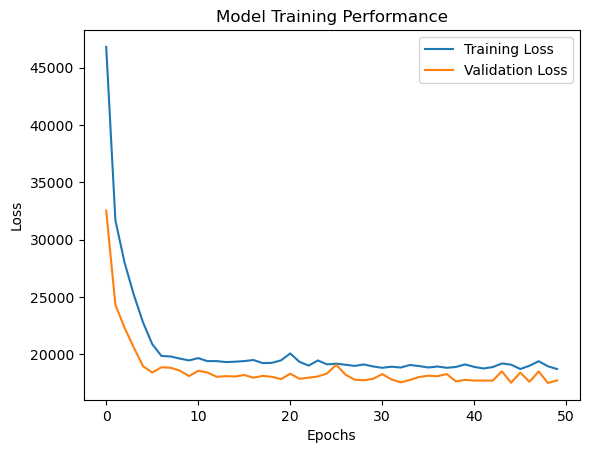

In [48]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [16]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[37636.367],
       [55393.152],
       [65494.305],
       [40141.645],
       [15568.455],
       [58586.516],
       [ 7446.759],
       [59559.664],
       [60984.938],
       [55118.973],
       [36797.473],
       [67987.31 ],
       [66400.06 ],
       [52950.387],
       [18472.117],
       [61699.45 ],
       [36270.074],
       [21731.936],
       [54642.19 ],
       [56808.777],
       [43471.605],
       [12165.036],
       [45542.465],
       [56064.414],
       [17682.207],
       [22311.367],
       [55533.395],
       [13788.815],
       [66179.984],
       [45830.645],
       [24681.46 ],
       [12045.151],
       [21432.31 ],
       [54706.348],
       [21789.477],
       [14240.911],
       [32250.656],
       [33649.957],
       [31598.557],
       [68469.984],
       [16554.754],
       [69919.93 ],
       [52938.453],
       [24795.246],
       [59072.824],
       [38658.566],
       [70999.34 ],
       [43920.105],
       [67078.55 ],
       [14974.718],


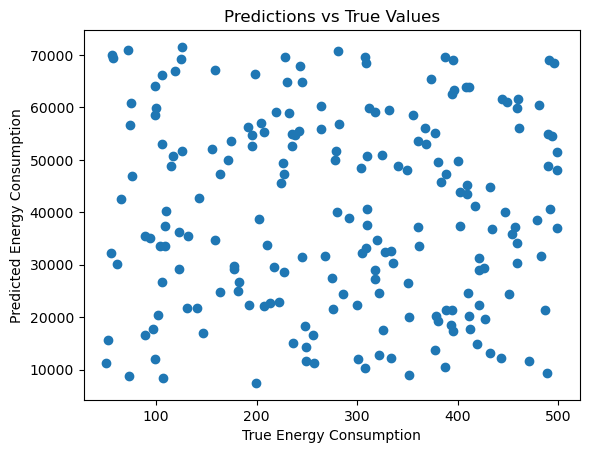

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()